# Gradient image features: Histogram of Oriented Gradients (HoG) introduction

**Overview**
This exercise introduces image gradient extraction and demonstrates how to compute Histogram of Oriented Gradients (HoG) features on a sample image. The extracted HoG features will be used in later exercises for classification.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#descriptor">Task 1: Calculate the HoG descriptor</a>
            </li>
            <li>
            <a href="#test1">Task 2: Reflect</a>
            </li>
            <li>
            <a href="#test">Task 3: Visualizing and understanding the HoG de…</a>
            </li>
            <li>
            <a href="#test2">Task 4: Reflect</a>
            </li>
            <li>
            <a href="#compare_images">Task 5: Comparing HoG Features</a>
            </li>
            <li>
            <a href="#compare_images1">Task 6: Evaluating HoG Features</a>
            </li>
            <li>
            <a href="#interpretation">Task 7: Interpretation/ Understanding questions</a>
            </li>
            <li>
            <a href="#interpretation1">Task 8: Interpretation/ Understanding questions</a>
            </li>
        </ul>
    </div>
</article>

The cell below loads a sample image.


(1080, 1920, 3)


Text(0.5, 1.0, 'Input image')

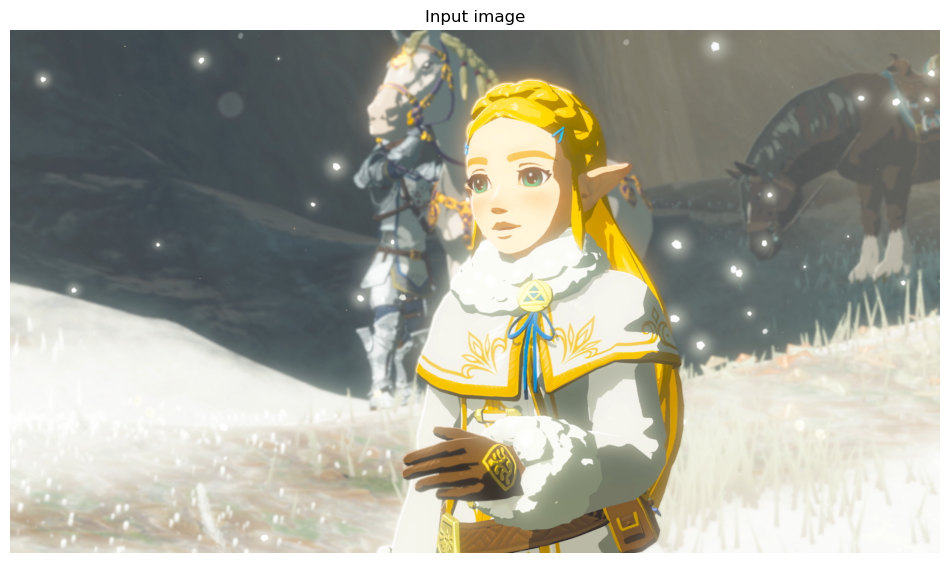

In [17]:
## load input image
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, exposure


fn =  "./data/zelda-white.bmp"
image = plt.imread(fn)
print(image.shape)

fig, ax1 = plt.subplots(figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

The following section: 
- Introduces the [HoG descriptor](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)

- Shows how to calculate a HoG featues for an image including a visualization of the HoG descriptor.

## Overview of Histogram of Oriented Gradients (HoG) Algorithm
The Histogram of Oriented Gradients (HoG) is a feature descriptor used to detect objects in images. 
The function [skimage.feature.HoG](https://scikit-image.org/docs/stable/api/skimage.feature.html<elem-3>.feature.HoG)
 computes
the HoG features. It also returns the feature descriptor vector (`fd`
), in which its
size is equal to the number of: Bins $\times$ Block Columns
$\times$ Block Rows $\times$ Cells in the Block.
The process involves the following stages:
**1. Preprocessing / Smoothing:**


Initially, the image undergoes a global intensity normalization to diminish the effects of lighting. A common technique involves gamma (power-law) transformation of pixels, which can be achieved by calculating the square root or logarithm of each color channel. This stage helps in reducing the impact of local shadowing and highlights variations since the image texture strength is generally related to the local surface illumination.
**2. Calculation of Image Gradients:**


This stage focuses on computing image gradients. The standard procedure is to either convert the image to grayscale or use the most prominent color channel. 
**Info**
This step was implemented by us in the first part of the exercise.

 
**3. Creation of Cells and Calculation of normalized Histograms:**


The objective is to create an encoding of local gradients. This involves partitioning the image window into smaller spatial cells. Each cell creates a histogram of image gradient orientations and performs various steps to normalize intensities and histograms. 
**4. Compilation of Feature Vector:**


The HoG feature is constructed by concatenating the histograms for each cell into a combined vector. 

---
**Task 1 (easy): Calculate the HoG descriptor👩‍💻**
1. Run the cell below to calculate and plot the HoG descriptor. 


---

(270, 220, 3)


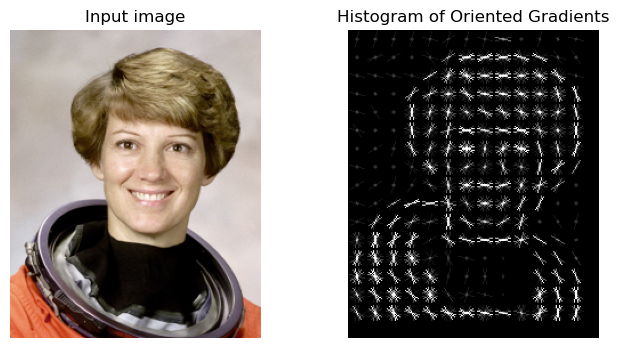

In [18]:
# load new image
image1 = data.astronaut()[:270,100:320]
print(image1.shape)

feature_vector=True,
bins = 8 
pixels_per_cell = 16
cells_per_block = 4 

(fd1, HoG_feat1) = hog(
    image1,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=True,
    channel_axis=-1
)
HoG_feat1 = HoG_feat1.astype("uint8")


# after implementation of the HoG function, run the following plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
HoG_image_rescaled = exposure.rescale_intensity(HoG_feat1, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(HoG_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


---
**Task 2 (easy): Reflect💡**
1. What charaterizes the local histograms and the HoG feature combined?


---

In [0]:
#Write your reflections here..
"""
Gradient-changes in different directions
"""


---
**Task 3 (easy): Visualizing and understanding the HoG descriptor👩‍💻**
Change the parameters of the HoG descriptor and visualize how the feature descriptor changes.
1. Change the parameters for the HoG descriptor:

- the number of bins
- the number of pixels per cell
- the number of cells per block

and visually observe how the dimensionality and the features change.
2. The following cell loads an image of a cat. Calculate the HoG descriptor of the cat image.


---

(270, 220, 3)


Text(0.5, 1.0, 'Histogram of Oriented Gradients')

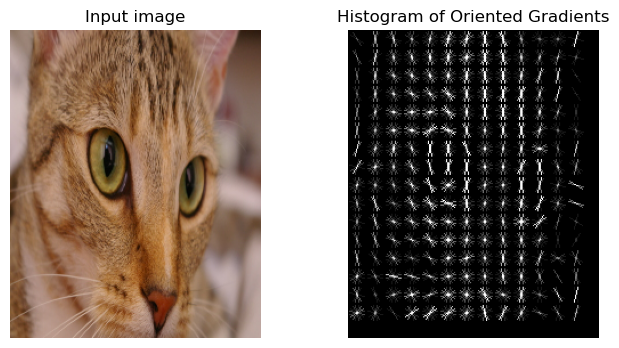

In [82]:
image2 = data.cat()[:270,:440:2]
print(image2.shape)

bins = 8#bins
pixels_per_cell = 16#pixels_per_cell
cells_per_block = 4#cells_per_block


fd2,HoG_feat2 = hog(
    image2,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=True,
    channel_axis=-1
)
HoG_feat2 = HoG_feat2.astype("uint8")
# after implementation of the HoG function, run the following plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
HoG_image_rescaled2 = exposure.rescale_intensity(HoG_feat2, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(HoG_image_rescaled2, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')


---
**Task 4 (easy): Reflect💡**
1. What charaterizes the local histograms and the HoG feature combined?


---

In [0]:
#Write your reflections here...
"""
sí
"""


---
**Task 5 (easy): Comparing HoG Features👩‍💻**
This task is about comparing HoG features of two different images. 
1. Change the parameters of the HoG descriptor and visually compare the HoG features.
2. Calculate the normalized (use `np.linalg.norm`
 to normalize vectors) scalar product between the two feature vectors `fd1`
 and `fd2`
.     - What is the scalar product between two feature vectors? (compare it to the value of 1 )
    - Repeat the calculation for multiple HoG filter parameters, and describe how these parameters influence the result. 




**Hint**
Set `feature_vector`
=True in `HoG`


3. Based on the cosine similarity (normalized inner product), explain how HoG features can be used to classify different images of cat/humans.


---

In [89]:
# calculate the similarity here..
print((fd1/np.linalg.norm(fd1))@(fd2/np.linalg.norm(fd2)))

0.4300893862777714


In [ ]:
#Write your reflections here...
"""
when it is 1 the two pictures are identicle
The closer it is to 1 the more similar are the pictures
"""


---
**Task 6 (easy): Evaluating HoG Features💡**
This task will compare two HoG features of different images. 
1. What is the scalar product between two feature vectors? (compare it to the value of 1 )
2. Repeat the calculation for multiple HoG filter settings, notice a difference? 


**Hint**
Set `feature_vector`
=True in `HoG`


3. Based on the cosine similarity (normalized inner product), explain how HoG features can be used to classify different images of cat/humans.


---

In [90]:
#Write your reflections here...
print(fd1@fd2)

55.911620216107536



---
**Task 7 (medium): Interpretation/ Understanding questions👩‍💻**
Select several images from the dataset (`peopleXY.jpg`
) and visually compare the HoG features of people and non-people images. 
1. Run the cell below to visualizes the HoG features


---

(480, 852, 3)
 HoG feature vector shape: (27, 50, 4, 4, 8)
 HoG feature vector shape after vectorization: (172800,)


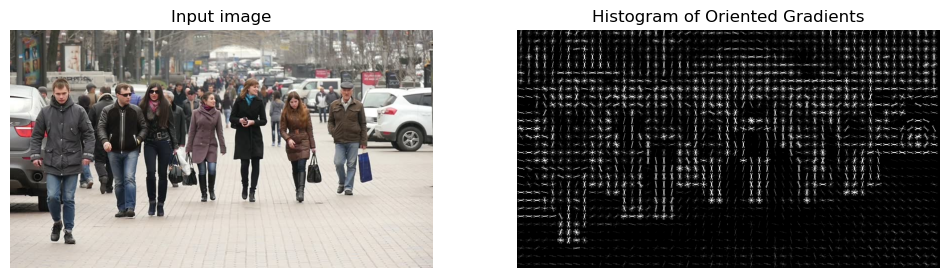

In [91]:
# load new image
fn =  "./data/people01.jpg"
image = plt.imread(fn)
print(image.shape)

feature_vector=True,
bins = 8 
pixels_per_cell = 16
cells_per_block = 4 

# Compute HoG.
(fd, HoG_feat) = hog(
    image,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=False,
    channel_axis=-1
)
HoG_feat = HoG_feat.astype("uint8")


print(f' HoG feature vector shape: {fd.shape}')
print(f' HoG feature vector shape after vectorization: {fd.reshape(-1).shape}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
HoG_image_rescaled = exposure.rescale_intensity(HoG_feat, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(HoG_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()


---
**Task 8 (medium): Interpretation/ Understanding questions💡**
1. How could HoG features be used to classify different objects in a larger image with multiple people? 

2. Explain how the HoG features use local information to create an understanding of the content of the full image? 



---

In [0]:
# write your reflections here
"""
We use our hog as a filter to recognize humans

if you find a human, image contains a human or a trashcan/child
"""